In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
# from sklearn.cross_validation import train_test_split,KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#'barishim5','jamaikuli','jobalal','jolkartika','kolashim','korishim','koromja','motorshim','reshmilishim'

IMAGE DATASET TO NUMPY DATASET

In [ ]:
# import necessary packages
 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report
# from pyimagesearch import simplepreprocessor
# from pyimagesearch import simpledatasetloader
from imutils import paths
import os
import glob
import cv2
import numpy as np
 
def getListOfFiles(dirName):
    # create a list of file and sub directories
    # names in the given directory
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
 
    return allFiles
 
imagePaths = getListOfFiles("/content/drive/MyDrive/shim 22-4-21/train") ## Folder structure: datasets --> sub-folders with labels name
#print(imagePaths)
 
data = []
lables = []
c = 0 ## to see the progress
for image in imagePaths:
 
    lable = os.path.split(os.path.split(image)[0])[1]
    lables.append(lable)
 
    img = cv2.imread(image)
    img = cv2.resize(img, (32, 32), interpolation = cv2.INTER_AREA)
    data.append(img)
    c=c+1
    # print(c)
 
#print(lables)
 
# encode the labels as integer
data = np.array(data)
lables = np.array(lables)
 
le = LabelEncoder()
lables = le.fit_transform(lables)
 
myset = set(lables)
print(myset)
 
dataset_size = data.shape[0]
data = data.reshape(dataset_size,-1)
 
print(data.shape)
print(lables.shape)
print(dataset_size)

{0, 1, 2, 3, 4, 5, 6, 7, 8}
(5402, 3072)
(5402,)
5402


In [ ]:
lables

array([8, 8, 8, ..., 0, 0, 0])

In [ ]:
lables.shape

(5402,)

In [ ]:
np.unique(lables) #total labels ##'barishim5','jamaikuli','jobalal','jolkartika','kolashim','korishim','koromja','motorshim','reshmilishim'

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
# Import module to standardize the scale
from sklearn.preprocessing import StandardScaler
# Create instance (i.e. object) of the standard scaler
scaler = StandardScaler()
# Fit the object to all the data except the Target Class
# use the .drop() method to gather all features except Target Class
# axis -> argument refers to columns; a 0 would represent rows
# scaler.fit(df.drop('TARGET CLASS', axis=1))

In [ ]:
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# Use scaler object to conduct a transforms
scaled_features = scaler.transform(data)
# Review the array of values generated from the scaled features process
scaled_features

array([[ 0.61519952,  0.54983097,  0.55668063, ...,  1.23832762,
         1.26324709,  1.25598653],
       [ 0.38570139,  0.38195488,  0.44394797, ...,  0.81153146,
         0.8703178 ,  0.87312831],
       [-1.20985705, -1.20727212, -1.21322212, ..., -1.22136605,
        -1.22145283, -1.22679097],
       ...,
       [-1.20985705, -1.20727212, -1.21322212, ..., -1.22136605,
        -1.22145283, -1.22679097],
       [-0.29186453, -0.27835774, -0.25499451, ...,  0.17133721,
         0.16535642,  0.16542071],
       [ 0.16713174,  0.14692835,  0.16211633, ...,  0.63182781,
         0.62762618,  0.61788951]])

In [ ]:
# Use the train_test_split() method to split the data into respective sets
# test_size -> argument refers to the size of the test subset
# random_state -> argument ensures guarantee that the output of Run 
# 1 will be equal to the output of Run 2, i.e. your split will be always the same
X_train, X_test, y_train, y_test = train_test_split(scaled_features, lables, test_size=0.2, random_state=101)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
# Fit (i.e. traing) the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
# Use the .predict() method to make predictions from the X_test subset
pred = knn.predict(X_test)
# Review the predictions
pred

array([0, 7, 4, ..., 3, 3, 7])

In [ ]:
# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Print out classification report and confusion matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69       133
           1       0.78      0.71      0.74       112
           2       0.85      0.69      0.76       120
           3       0.70      0.75      0.72       115
           4       0.74      0.79      0.76       127
           5       0.86      0.76      0.81       130
           6       0.70      0.70      0.70       110
           7       0.65      0.81      0.72       122
           8       0.84      0.82      0.83       112

    accuracy                           0.75      1081
   macro avg       0.76      0.75      0.75      1081
weighted avg       0.76      0.75      0.75      1081



In [ ]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 93
FP - False Positive 8
FN - False Negative 3
TP - True Positive 80
Accuracy Rate: 0.16003700277520813
Misclassification Rate: 0.010175763182238668


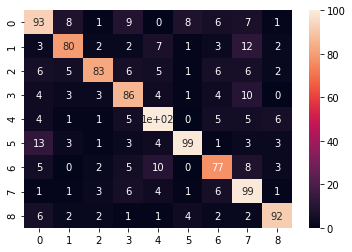

In [ ]:
import seaborn as sns
sns.heatmap(cmat, annot=True)


In [ ]:
#Evaluate alternative K-values for better predictions

In [ ]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

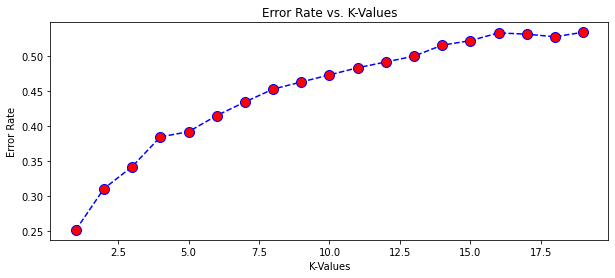

In [ ]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,20), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

In [ ]:
# Retrain model using optimal k-value
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [ ]:
# Print out classification report and confusion matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.46      0.68      0.55       133
           1       0.53      0.57      0.55       112
           2       0.78      0.60      0.68       120
           3       0.52      0.57      0.54       115
           4       0.71      0.72      0.71       127
           5       0.86      0.55      0.67       130
           6       0.64      0.56      0.60       110
           7       0.56      0.64      0.60       122
           8       0.72      0.62      0.67       112

    accuracy                           0.62      1081
   macro avg       0.64      0.61      0.62      1081
weighted avg       0.64      0.62      0.62      1081



In [ ]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 90
FP - False Positive 7
FN - False Negative 16
TP - True Positive 64
Accuracy Rate: 0.14246068455134134
Misclassification Rate: 0.02127659574468085


In [ ]:
##More APPORACH to see knn

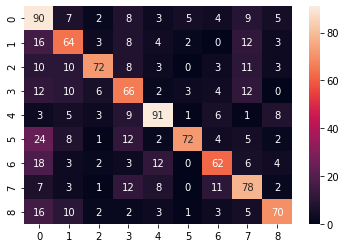

In [ ]:
sns.heatmap(cmat, annot=True)


In [ ]:
(trainX, testX, trainY, testY ) = train_test_split(data, lables, test_size= 0.25, random_state=42)

In [ ]:
model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
model.fit(trainX, trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
print(classification_report(testY, model.predict(testX), target_names=le.classes_))

              precision    recall  f1-score   support

   barishim5       0.44      0.77      0.56       143
   jamaikuli       0.70      0.67      0.69       168
     jobalal       0.75      0.68      0.71       130
  jolkartika       0.58      0.68      0.63       142
    kolashim       0.68      0.72      0.70       145
    korishim       0.85      0.64      0.73       141
     koromja       0.78      0.58      0.66       161
   motorshim       0.69      0.66      0.67       151
reshmilishim       0.80      0.62      0.70       170

    accuracy                           0.67      1351
   macro avg       0.70      0.67      0.67      1351
weighted avg       0.70      0.67      0.67      1351



Accuracy for 0 is 0.7601776461880089


Text(0, 0.5, 'Accuracy')

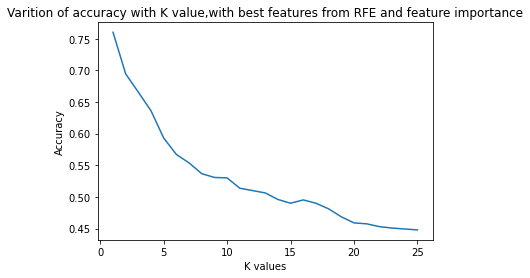

In [ ]:
k_values = np.arange(1,26)
scores = []

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(trainX,trainY)
    y_predict = clf.predict(testX)
    scores.append(accuracy_score(testY,y_predict))

print("Accuracy for {} is {}".format(np.argmax(scores),max(scores)))

plt.plot(np.arange(1,26),scores)
plt.title('Varition of accuracy with K value,with best features from RFE and feature importance')
plt.xlabel('K values')
plt.ylabel('Accuracy')

#SVM

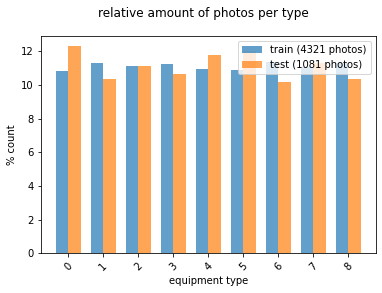

In [ ]:
def plot_bar(lables, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(lables, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(lables)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

In [ ]:
#'barishim5'=0,
#'jamaikuli'=1,
#'jobalal'=2,
#'jolkartika'=3,
#'kolashim'=4,
#'korishim'=5,
#'koromja'=6,
#'motorshim'=7,
#'reshmilishim'=8

In [ ]:
from sklearn import datasets, svm, metrics

In [ ]:
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, lables, test_size=0.2, shuffle=True)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

In [ ]:
# predicted

In [ ]:
print(classification_report(y_test, predicted,target_names=le.classes_))

              precision    recall  f1-score   support

   barishim5       1.00      0.37      0.54       133
   jamaikuli       1.00      0.55      0.71       128
     jobalal       1.00      0.48      0.65       115
  jolkartika       1.00      0.44      0.61       116
    kolashim       1.00      0.47      0.64       114
    korishim       1.00      0.43      0.61       115
     koromja       0.17      1.00      0.28       105
   motorshim       1.00      0.46      0.63       123
reshmilishim       1.00      0.47      0.64       132

    accuracy                           0.51      1081
   macro avg       0.91      0.52      0.59      1081
weighted avg       0.92      0.51      0.59      1081



In [ ]:
#another way
svm_classifier = svm.SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)
ypred_sklearn = svm_classifier.predict(X_test)
# svm_classifier.score(image_data,labels)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
svm_classifier.score(X_test,y_test) #accuracy

0.7465309898242368

In [ ]:
pred = svm_classifier.predict(X_test)

In [ ]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 89
FP - False Positive 9
FN - False Negative 9
TP - True Positive 96
Accuracy Rate: 0.1711378353376503
Misclassification Rate: 0.016651248843663275


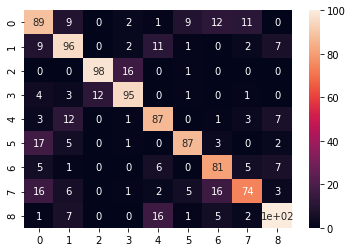

In [ ]:
sns.heatmap(cmat, annot=True)

# DECISSION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.22849213691026826


In [ ]:
#better result

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
 
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
 
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6577243293246994


In [ ]:
predicted = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, predicted,target_names=le.classes_))

              precision    recall  f1-score   support

   barishim5       0.72      0.70      0.71       133
   jamaikuli       0.68      0.76      0.72       128
     jobalal       0.67      0.68      0.67       115
  jolkartika       0.64      0.68      0.66       116
    kolashim       0.67      0.61      0.64       114
    korishim       0.72      0.63      0.67       115
     koromja       0.48      0.56      0.52       105
   motorshim       0.62      0.64      0.63       123
reshmilishim       0.74      0.64      0.69       132

    accuracy                           0.66      1081
   macro avg       0.66      0.66      0.66      1081
weighted avg       0.66      0.66      0.66      1081



In [ ]:
pred = clf.predict(X_test)

In [ ]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 93
FP - False Positive 6
FN - False Negative 1
TP - True Positive 97
Accuracy Rate: 0.1757631822386679
Misclassification Rate: 0.0064754856614246065


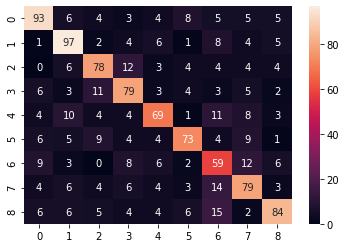

In [ ]:
sns.heatmap(cmat, annot=True)